In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#import terhadap library
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np

In [ ]:
from torch.utils.data import Dataset

class IrisDataset(Dataset):
  def __init__(self, X, y):
    self.X = X #feature data
    self.y = y #class

  def __getitem__(self, index):
    X = torch.Tensor(self.X[index]) #tensor
    y = torch.LongTensor(self.y[index, None]) #long tensor
    
    return X, y

  def __len__(self):
    return len(self.X)

In [ ]:
# open dataset from csv
dataset = pd.read_csv('iris.csv') 

# transform labels to numerics
dataset.loc[dataset.species=='Iris-setosa', 'species'] = 0
dataset.loc[dataset.species=='Iris-versicolor', 'species'] = 1
dataset.loc[dataset.species=='Iris-virginica', 'species'] = 2

# get the features and labels from the dataset
X = dataset[dataset.columns[0:4]].values
y = dataset.species.values.astype(np.int64)

print(X)
# preprocessing with z-score normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, 
                                                      test_size=0.2)

from torch.utils.data import DataLoader

train_ds = IrisDataset(train_X, train_y) #ngeload dataset kita
train_loader = DataLoader(train_ds, batch_size=16, 
                             shuffle=True, num_workers=0)

valid_ds = IrisDataset(valid_X, valid_y)
valid_loader = DataLoader(valid_ds, batch_size=16, 
                             shuffle=False, num_workers=0)

test_ds = IrisDataset(test_X, test_y)
test_loader = DataLoader(test_ds, batch_size=16, 
                            shuffle=False, num_workers=0)


In [ ]:
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        #input layer
        self.fc1 = nn.Linear(4, 100) #input features, output feature
        #hidden layer
        self.fc2 = nn.Linear(100, 150)
        #output layer
        self.fc3 = nn.Linear(150,3) #input feature, class #versicolor: 0.7, virginica: 0.1, setosa: 0.2
        
        self.bn1 = nn.BatchNorm1d(100)
        self.bn2 = nn.BatchNorm1d(150)
        
        
    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X)
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

In [ ]:
# Instantiating the model
net = Net()

# Choosing the loss function
criterion = nn.CrossEntropyLoss() #kelas lebih dari 2

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# alternatif optimizer: Adam
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 50
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss)
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================
    # validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================
            

Epoch 0
training loss: 0.75815296
validation loss: 0.46777484
Epoch 1
training loss: 0.41242424
validation loss: 0.30746037
Epoch 2
training loss: 0.35393122
validation loss: 0.24943152
Epoch 3
training loss: 0.22046687
validation loss: 0.20865309
Epoch 4
training loss: 0.17370896
validation loss: 0.18477423
Epoch 5
training loss: 0.13677640
validation loss: 0.17272647
Epoch 6
training loss: 0.18171154
validation loss: 0.14307299
Epoch 7
training loss: 0.11356410
validation loss: 0.13697287
Epoch 8
training loss: 0.13889267
validation loss: 0.12518571
Epoch 9
training loss: 0.14772719
validation loss: 0.12645778
Epoch 10
training loss: 0.09429955
validation loss: 0.11699475
Epoch 11
training loss: 0.09977981
validation loss: 0.10861710
Epoch 12
training loss: 0.20809118
validation loss: 0.10819656
Epoch 13
training loss: 0.12248147
validation loss: 0.10636172
Epoch 14
training loss: 0.15113510
validation loss: 0.09239773
Epoch 15
training loss: 0.11230364
validation loss: 0.08856031
Ep

RuntimeError: ignored

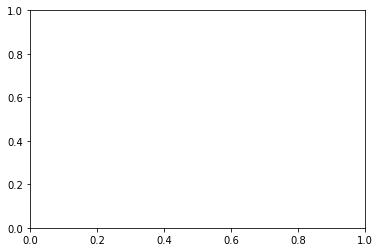

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,epochs+1), train_mean_losses)
plt.plot(range(1,epochs+1), valid_mean_losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train and Validation Loss Plot')
plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,3))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))



Predicted Class:
[0 2 0 1 0 2 0 0 0 0 1 2 0 1 0 1 2 2 2 1 0 1 2 2 0 1 0 2 2 2]

Ground Truth:
[0 1 0 1 0 2 0 0 0 0 0 2 0 1 0 1 2 2 2 1 0 2 2 2 0 2 0 2 2 2]


Confusion Matrix:
[[12  1  0]
 [ 0  4  1]
 [ 0  2 10]]


Accuracy: 0.8666666666666667
F1 Score:  0.8320772946859903


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.57      0.80      0.67         5
           2       0.91      0.83      0.87        12

    accuracy                           0.87        30
   macro avg       0.83      0.85      0.83        30
weighted avg       0.89      0.87      0.87        30

